In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
head_injury = pd.read_csv("/content/drive/MyDrive/Brain-injury.csv")
head_injury.head(5)

,Unnamed: 0,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,1,0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,0,0


In [4]:
head_injury.drop('Unnamed: 0', axis = 1, inplace=True)
head_injury

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3116,0,0,0,0,0,1,1,0,0,0,0
3117,0,0,0,0,0,0,1,0,0,1,0
3118,0,0,0,0,0,0,0,0,0,0,0
3119,0,0,0,0,0,0,0,0,0,0,0


In [5]:
head_injury.isnull().sum()

age.65                               0
amnesia.before                       0
basal.skull.fracture                 0
GCS.decrease                         0
GCS.13                               0
GCS.15.2hours                        0
high.risk                            0
loss.of.consciousness                0
open.skull.fracture                  0
vomiting                             0
clinically.important.brain.injury    0
dtype: int64

In [6]:
head_injury.describe()

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000
mean,0.115988,0.204742,0.069849,0.022749,0.037488,0.126562,0.242871,0.111823,0.036847,0.098686,0.080103
std,0.320262,0.403578,0.254934,0.149127,0.189985,0.332535,0.428886,0.315199,0.188417,0.298288,0.271495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
head_injury.dtypes

age.65                               int64
amnesia.before                       int64
basal.skull.fracture                 int64
GCS.decrease                         int64
GCS.13                               int64
GCS.15.2hours                        int64
high.risk                            int64
loss.of.consciousness                int64
open.skull.fracture                  int64
vomiting                             int64
clinically.important.brain.injury    int64
dtype: object

In [8]:
head_injury.apply(pd.value_counts)

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,2759,2482,2903,3050,3004,2726,2363,2772,3006,2813,2871
1,362,639,218,71,117,395,758,349,115,308,250


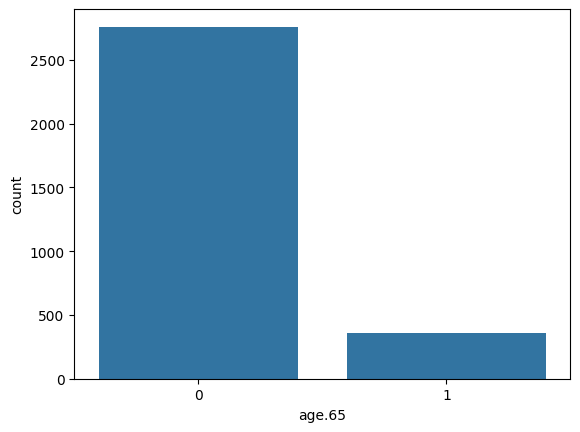

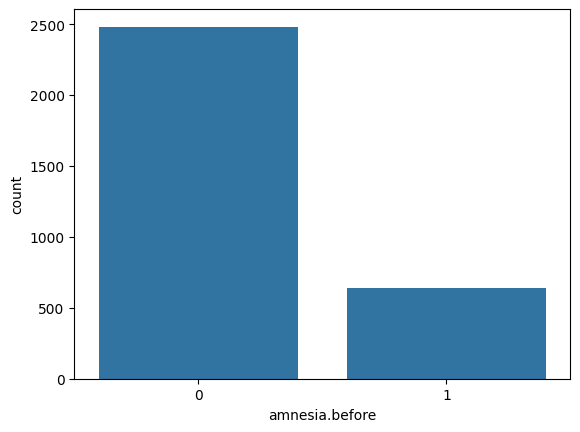

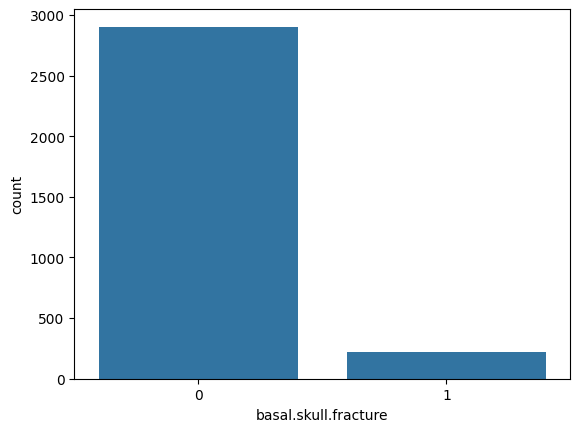

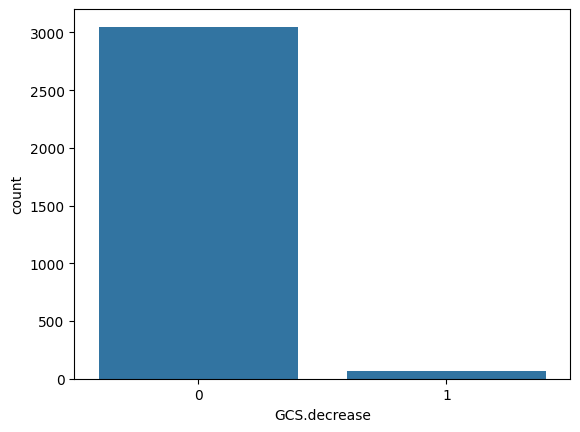

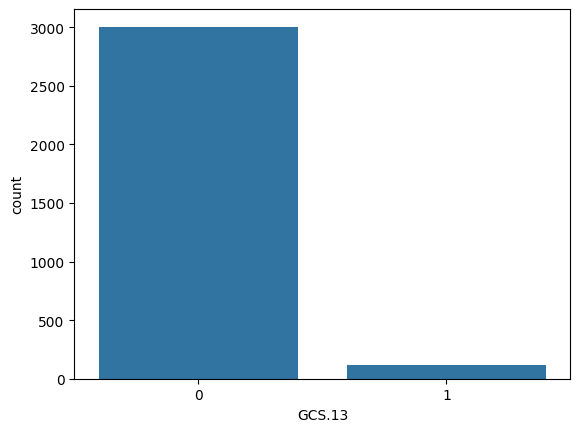

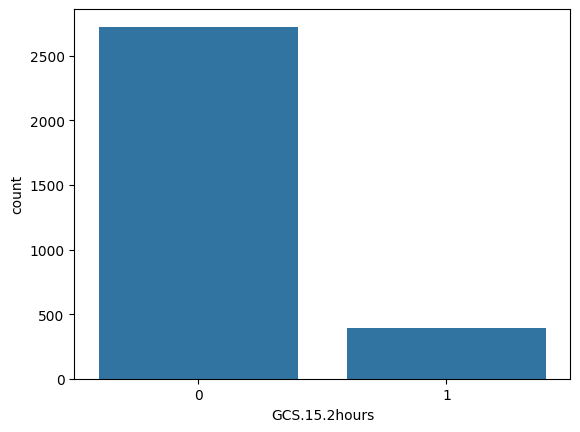

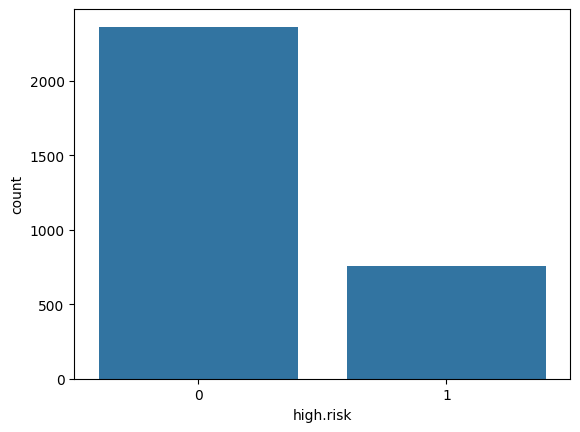

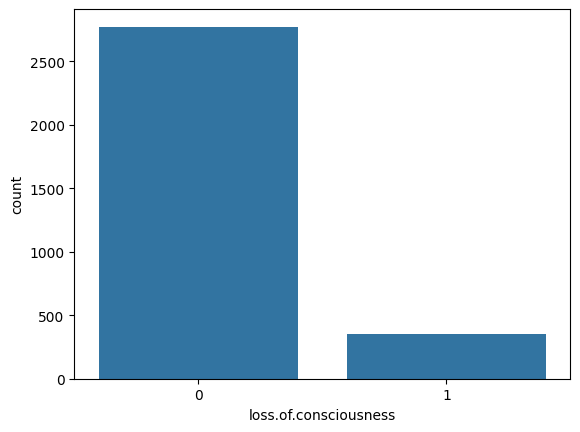

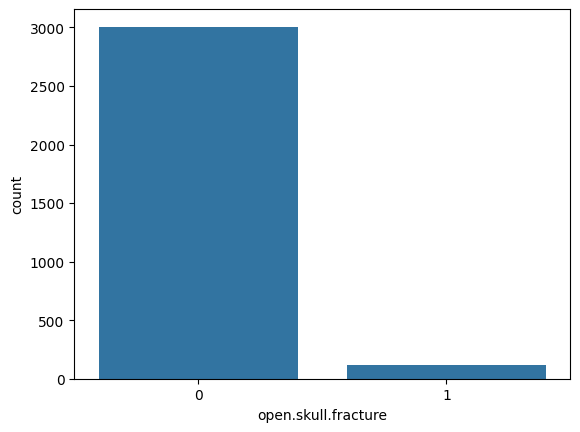

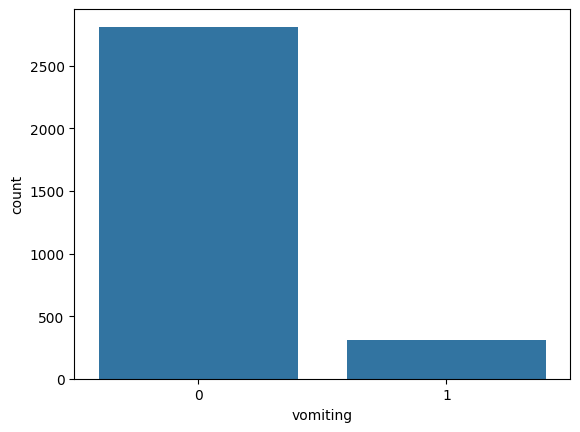

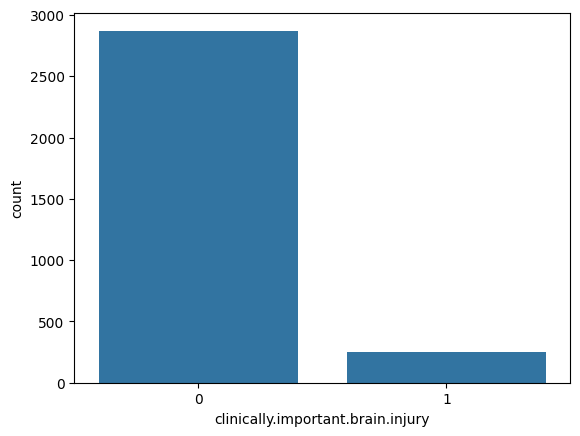

In [9]:
for i, col in enumerate(head_injury.columns):
    plt.figure(i)
    sns.countplot(x=head_injury[col])

In [10]:
head_injury.corr()

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
age.65,1.000000,0.051786,0.026359,0.085664,0.007529,0.075794,0.049191,0.046102,0.061940,0.031120,0.191692
amnesia.before,0.051786,1.000000,-0.014435,0.029095,0.037811,0.057621,0.012602,0.003893,0.027206,0.031788,0.101839
basal.skull.fracture,0.026359,-0.014435,1.000000,0.152095,0.111358,0.092287,0.044130,0.006472,0.013127,0.048413,0.243291
GCS.decrease,0.085664,0.029095,0.152095,1.000000,0.071705,0.116430,0.068936,0.020869,0.050007,0.072005,0.113305
GCS.13,0.007529,0.037811,0.111358,0.071705,1.000000,0.112588,0.045567,0.004906,0.024076,0.047812,0.153036
GCS.15.2hours,0.075794,0.057621,0.092287,0.116430,0.112588,1.000000,0.081052,0.045348,0.038087,0.042067,0.310139
high.risk,0.049191,0.012602,0.044130,0.068936,0.045567,0.081052,1.000000,0.055096,0.035974,0.115736,0.193458
loss.of.consciousness,0.046102,0.003893,0.006472,0.020869,0.004906,0.045348,0.055096,1.000000,-0.004639,0.015540,0.116273
open.skull.fracture,0.061940,0.027206,0.013127,0.050007,0.024076,0.038087,0.035974,-0.004639,1.000000,0.032227,0.073860
vomiting,0.031120,0.031788,0.048413,0.072005,0.047812,0.042067,0.115736,0.015540,0.032227,1.000000,0.171482


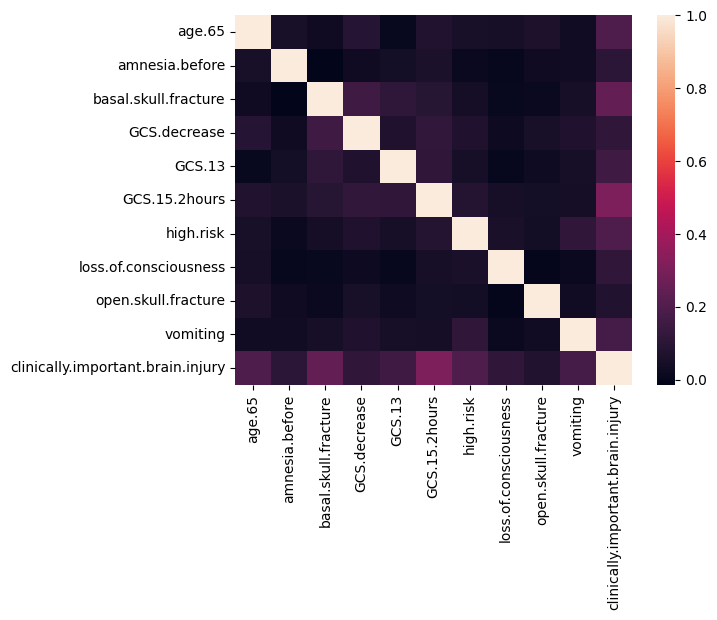

In [11]:
hmap = sns.heatmap(head_injury.corr())
plt.show()

#**Split the data up in training and test sets**

In [12]:
# grabbing all input variables
X = head_injury.drop('clinically.important.brain.injury', axis =1)

# grabbing just the traget variable
y = head_injury[['clinically.important.brain.injury']]

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# getting the shape of each set
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of y_test is ", y_test.shape)

Shape of X_train is  (2184, 10)
Shape of y_train is  (2184, 1)
Shape of X_test is  (937, 10)
Shape of y_test is  (937, 1)


#**SVM**

The accuracy of the SVM classifier on the training set is  0.9505494505494505
The accuracy of the SVM classifier on the test set is  0.9178228388473852
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       847
           1       0.76      0.21      0.33        90

    accuracy                           0.92       937
   macro avg       0.84      0.60      0.64       937
weighted avg       0.91      0.92      0.90       937

Confusion Matrix on the test set:
 [[841   6]
 [ 71  19]]


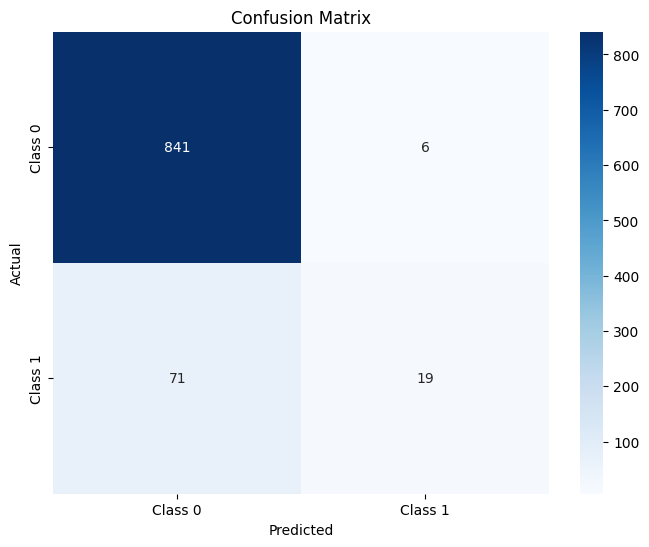

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


clf_svm = SVC(random_state=0)
svm_model = clf_svm.fit(X_train, y_train.values.ravel())
y_svm_train_pred = svm_model.predict(X_train)
y_svm_test_pred = svm_model.predict(X_test)

accuracy_training_svm = accuracy_score(y_train, y_svm_train_pred)
print("The accuracy of the SVM classifier on the training set is ", accuracy_training_svm)

accuracy_test_svm = accuracy_score(y_test, y_svm_test_pred)
print("The accuracy of the SVM classifier on the test set is ", accuracy_test_svm)

print("Classification Report on the test set:\n", classification_report(y_test, y_svm_test_pred))

conf_matrix = confusion_matrix(y_test, y_svm_test_pred)
print("Confusion Matrix on the test set:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**KNN**

The accuracy of the KNN classifier on the training set is  0.9381868131868132
The accuracy of the KNN classifier on the test set is  0.9167556029882604
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       847
           1       0.73      0.21      0.33        90

    accuracy                           0.92       937
   macro avg       0.83      0.60      0.64       937
weighted avg       0.90      0.92      0.90       937

Confusion Matrix on the test set:
 [[840   7]
 [ 71  19]]


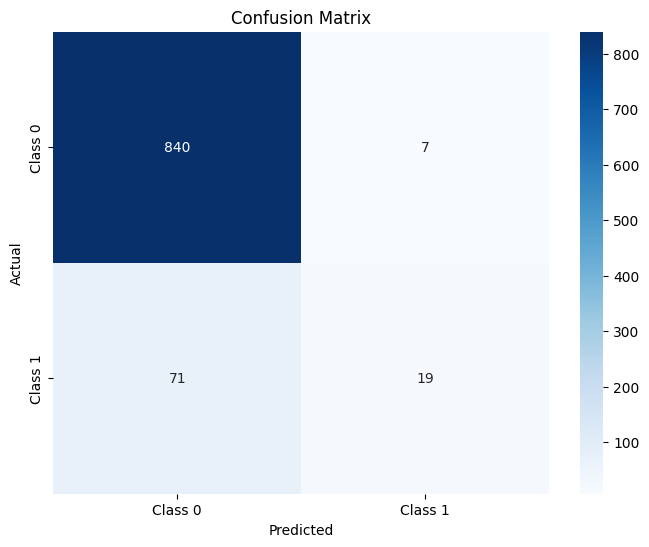

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
knn_model = clf_knn.fit(X_train, y_train.values.ravel())

y_knn_train_pred = knn_model.predict(X_train)
y_knn_test_pred = knn_model.predict(X_test)

accuracy_training_knn = accuracy_score(y_train, y_knn_train_pred)
print("The accuracy of the KNN classifier on the training set is ", accuracy_training_knn)

accuracy_test_knn = accuracy_score(y_test, y_knn_test_pred)
print("The accuracy of the KNN classifier on the test set is ", accuracy_test_knn)

print("Classification Report on the test set:\n", classification_report(y_test, y_knn_test_pred))

conf_matrix_knn = confusion_matrix(y_test, y_knn_test_pred)
print("Confusion Matrix on the test set:\n", conf_matrix_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Coarse Gaussian Algorithm**

The accuracy of the Coarse Gaussian classifier on the training set is  0.9386446886446886
The accuracy of the Coarse Gaussian classifier on the test set is  0.9188900747065102
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       847
           1       0.82      0.20      0.32        90

    accuracy                           0.92       937
   macro avg       0.87      0.60      0.64       937
weighted avg       0.91      0.92      0.90       937

Confusion Matrix on the test set:
 [[843   4]
 [ 72  18]]


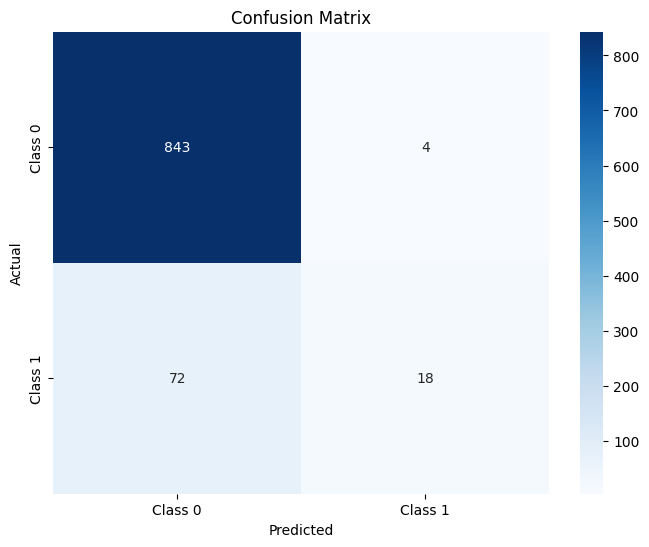

In [15]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Coarse Gaussian Algorithm
clf_gp = GaussianProcessClassifier(kernel=RBF(), random_state=0)
gp_model = clf_gp.fit(X_train, y_train.values.ravel())
y_gp_train_pred = gp_model.predict(X_train)
y_gp_test_pred = gp_model.predict(X_test)

# Training set accuracy
accuracy_training_gp = accuracy_score(y_train, y_gp_train_pred)
print("The accuracy of the Coarse Gaussian classifier on the training set is ", accuracy_training_gp)

# Test set accuracy
accuracy_test_gp = accuracy_score(y_test, y_gp_test_pred)
print("The accuracy of the Coarse Gaussian classifier on the test set is ", accuracy_test_gp)

# Classification report on the test set
print("Classification Report on the test set:\n", classification_report(y_test, y_gp_test_pred))

# Confusion matrix on the test set
conf_matrix_gp = confusion_matrix(y_test, y_gp_test_pred)
print("Confusion Matrix on the test set:\n", conf_matrix_gp)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gp, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Subspace Discriminant Algorithm**

The accuracy of the Linear Discriminant Analysis on the training set is  0.9290293040293041
The accuracy of the Linear Discriminant Analysis on the test set is  0.9114194236926361
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       847
           1       0.54      0.49      0.51        90

    accuracy                           0.91       937
   macro avg       0.74      0.72      0.73       937
weighted avg       0.91      0.91      0.91       937

Confusion Matrix on the test set:
 [[810  37]
 [ 46  44]]


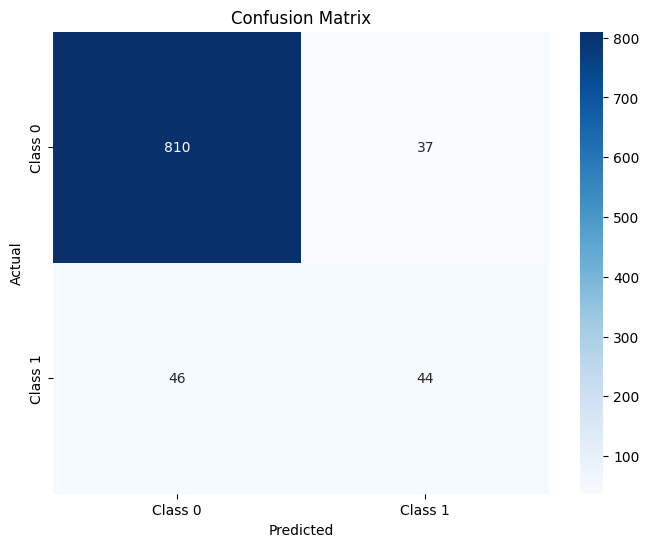

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

clf_lda = LinearDiscriminantAnalysis()
lda_model = clf_lda.fit(X_train, y_train.values.ravel())
y_lda_train_pred = lda_model.predict(X_train)
y_lda_test_pred = lda_model.predict(X_test)

accuracy_training_lda = accuracy_score(y_train, y_lda_train_pred)
print("The accuracy of the Linear Discriminant Analysis on the training set is ", accuracy_training_lda)

accuracy_test_lda = accuracy_score(y_test, y_lda_test_pred)
print("The accuracy of the Linear Discriminant Analysis on the test set is ", accuracy_test_lda)

print("Classification Report on the test set:\n", classification_report(y_test, y_lda_test_pred))

conf_matrix_lda = confusion_matrix(y_test, y_lda_test_pred)
print("Confusion Matrix on the test set:\n", conf_matrix_lda)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#**Bagged Tree Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy of the Bagged Tree classifier on the training set is  0.9523809523809523
The accuracy of the Bagged Tree classifier on the test set is  0.9167556029882604
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       847
           1       0.67      0.27      0.38        90

    accuracy                           0.92       937
   macro avg       0.80      0.63      0.67       937
weighted avg       0.90      0.92      0.90       937

Confusion Matrix on the test set:
 [[835  12]
 [ 66  24]]


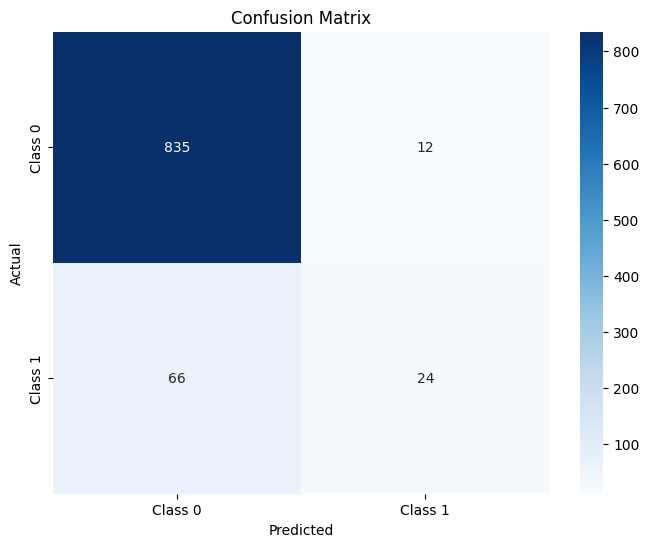

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Replace SVM with Bagged Tree Algorithm
clf_bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
bagged_tree_model = clf_bagged_tree.fit(X_train, y_train.values.ravel())
y_bagged_tree_train_pred = bagged_tree_model.predict(X_train)
y_bagged_tree_test_pred = bagged_tree_model.predict(X_test)

# Training set accuracy
accuracy_training_bagged_tree = accuracy_score(y_train, y_bagged_tree_train_pred)
print("The accuracy of the Bagged Tree classifier on the training set is ", accuracy_training_bagged_tree)

# Test set accuracy
accuracy_test_bagged_tree = accuracy_score(y_test, y_bagged_tree_test_pred)
print("The accuracy of the Bagged Tree classifier on the test set is ", accuracy_test_bagged_tree)

# Classification report on the test set
print("Classification Report on the test set:\n", classification_report(y_test, y_bagged_tree_test_pred))

# Confusion matrix on the test set
conf_matrix_bagged_tree = confusion_matrix(y_test, y_bagged_tree_test_pred)
print("Confusion Matrix on the test set:\n", conf_matrix_bagged_tree)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagged_tree, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
